# WP3: Component architecture

by Luca De Feo  
Project review – 2nd reporting period

## Architecture of our VREs

```
   User Interfaces / Collaborative workspaces
        (Jupyter, CoCalc, Simulagora)
                       ↓
————————————————————————————————————————————————————
                    Kernels
(Python, GAP, MMT, PARI/GP, SageMath, Singular, ...)
       ↓                          ↓
Modules, Libraries            Database
(LinBox, MPIR, ...)     (LMFDB, MathHub, ....)
————————————————————————————————————————————————————
```

## Components should be

- **Flexible.** Enable components to be *flexibly combined*;
- **Portable.** Enable components *run smoothly* across a wide range
  of environments (e.g., cloud, local, server, ...);
- **Modular.** Develop, demonstrate, standardize APIs;
- **Open.** Streamline user/developer workflows.


## Use Cases


> "Adrian is a student in Applied Algebra. For his Cryptography course, he programs elliptic curve cryptography in SageMath on his Windows laptop."

*SageMath*'s elliptic curves **module** calls C functions in the *PARI/GP* **library** via the *CyPari* Python bindings.

> Betty is a GAP user. She wants import data on modular forms from LMFDB and compute modular symbols.

*GAP* connects to the *LMFDB* **database** via *SCSCP*, downloads data, then computes modular symbols.

> Charlie only has GAP installed, but can access a remote server which provides Singular. He does not know how to use Singular, but he knows it is the best tool for Gröbner bases.

He connects to *Singular* via the *MMT mediator*, sends the computation to the server, recovers the results in his local *GAP*.

> Dan is the sysadmin at his Mathematics department. He needs to deploy a server for teaching PARI/GP and SageMath to ~100 students enrolled in the Bachelor program.

He uses Docker Compose to configure a *JupyterHub* deployment on the department server, based on *OpenDreamKit's* Docker **images**.

> Élise is an engineer at CNRS, she wants to set-up a Jupyter service on her national infrastructure for doing computations on a HPC cluster.

She uses Kubernetes to deploy a *JupyterHub* service based on *OpenDreamKit's* Docker **images**.

## WP3 Inputs/Outputs

### Inputs

- **WP4 →** User interface components;
- **WP5 →** HPC-enabled components;
- **WP6 →** Interface languages, ontologies;

### Outputs

- Network protocol implementations **→ WP4, WP6**;
- Ready to install packages/images **→ WP4, WP5**.

## What did we focus on during RP2?

1. User workflows (D3.5)
2. Continuous testing/integration (D3.8)
3. Packaging / Deployments (D3.7, D3.10)

### 1. User workflows

> **Aim 3:** Identify and promote best practices in computational mathematical research including:
making results easily reproducible; producing reusable and easily accessible software;
sharing data in a semantically sound way; exploiting and supporting the growing ecosystem
of computational tools.

**Our goal:** lower the entry barrier to contribute code, documentation, ...

**Actions (D3.5):**

- Modernize SageMath development tools to allow interactions with popular platforms (GitHub, GitLab)
- Make it easy to propose fixes to SageMath's documentation, with little programming/tooling knowledge needed

### 2. Continuous testing/integration

> **Continuous testing** is the process of executing automated tests as part of the software delivery pipeline to obtain immediate feedback on the business risks associated with a software release candidate.

> **Aim 3:** Identify and promote best practices in computational mathematical research including:
making results easily reproducible; producing reusable and easily accessible software;
sharing data in a semantically sound way; exploiting and supporting the growing ecosystem
of computational tools.

> **Aim 4:** Maximise sustainability and impact in mathematics, neighbouring fields, and scientific computing.

**Actions (D3.8):** Modernize our CI infrastructure, relying on popular software/services (e.g., Travis, Codecov, Docker, Circle CI, GitLab)

**Highlights:**

- For **SageMath**, Docker-based CI on GitLab, instantaneous code review in Binder.
- For **GAP**, Docker-based CI on Travis, gamified coverage tests on Codecov, tools to assist package developers.

### GAP metrics dashboard

Excerpt from: <https://github.com/gap-system/gap-distribution>

#### Core GAP system tests

| for branch | status | code coverage |
|------------|--------|---------------|
| `master`   | [![Build Status](https://travis-ci.org/gap-system/gap.svg?branch=master)](https://travis-ci.org/gap-system/gap) | [![Code Coverage](https://codecov.io/github/gap-system/gap/coverage.svg?branch=master&token=)](https://codecov.io/gh/gap-system/gap) |
| `stable-4.10` | [![Build Status](https://travis-ci.org/gap-system/gap.svg?branch=stable-4.10)](https://travis-ci.org/gap-system/gap) | [![Code Coverage](https://codecov.io/github/gap-system/gap/coverage.svg?branch=stable-4.10&token=)](https://codecov.io/gh/gap-system/gap) |
| `stable-4.9`  | [![Build Status](https://travis-ci.org/gap-system/gap.svg?branch=stable-4.9)](https://travis-ci.org/gap-system/gap) | [![Code Coverage](https://codecov.io/github/gap-system/gap/coverage.svg?branch=stable-4.9&token=)](https://codecov.io/gh/gap-system/gap) |

GAP package release statistics
![](gap.png)

### 3. Packaging / Deployments

> **Aim 2:** Make it easy for teams of researchers of any size to set up custom, collaborative Virtual
Research Environments tailored to their specific needs, resources and workflows. The VRE
should support the entire life-cycle of computational work in mathematical research, from
initial exploration to publication, teaching and outreach.

**Actions:**

- Rewritten GAP build system.
- Rewritten and officially supported libGAP (in GAP 4.10).
- Docker images (D3.1), tutorials / blog posts on Docker-based deployments
- SageMath on Windows installer (D3.7)

**Future / in progress actions:**

- Packaging for major Linux distributions (D3.10)
- HPC-enabled SageMath distribution (D3.11)

### SageMath on Windows (since v8.0, July 2017)

![](sage-downloads.png)

### Deploying VREs

- Deploying medium-sized JupyterHub instances (blog post: <https://opendreamkit.org/2018/10/17/jupyterhub-docker/>)
  
  - Workload: 1 person, ~20 hours of work
  - 244 lines of configuration
  
  **Compare to** SageMath notebook server (deprecated): no pluggable authentication, no containerization, no network isolation, security issues, co

- Deploying JupyterHub on OpenStack clusters (blog post: <https://blog.jupyter.org/how-to-deploy-jupyterhub-with-kubernetes-on-openstack-f8f6120d4b1>)

- Binder compatible Docker images, see <https://opendreamkit.org/try>.

- CoCalc offers deployments based on similar technologies, we constantly keep contact and cross-pollinate.

## Linux distributions

> **Milestone 5:** “ODK’s computational components available on major platforms” (month 42). 
>
> *User story:* users shall be able to easily install ODK’s computational components on the three major
> platforms (Windows, Mac, Linux) via their standard distribution channels.

- Packages available for all components on Debian, Ubuntu, Fedora, Arch, Gentoo, ...
- Experimental Conda Forge packages

In [4]:
import requests, json, io
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

### Arch

Based upon voluntary reports from ~30k users

In [8]:
arch_url = 'https://pkgstats.archlinux.de/package/datatables?draw=9&columns[0][data]=pkgname&columns[0][name]=&columns[0][searchable]=true&columns[0][orderable]=false&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=count&columns[1][name]=&columns[1][searchable]=false&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&order[0][column]=1&order[0][dir]=desc&start=0&length=25&search[value]=%s&search[regex]=false&_=1540794499985'
systems = ['scilab-bin', 'sagemath', 'singular', 'gap', 'pari', 'jupyter', 'chromium', 'firefox']
stats = { s: requests.get(arch_url % s).json() for s in systems }

<BarContainer object of 8 artists>

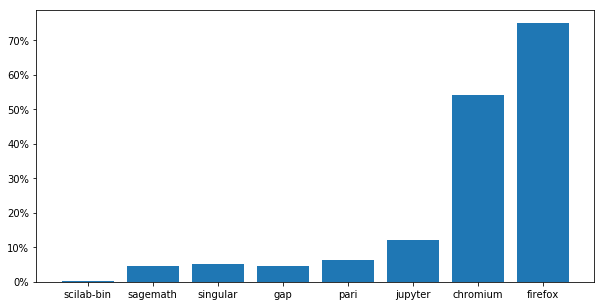

In [9]:
fig = plt.figure(1, (10,5)); ax = fig.add_subplot(1,1,1); ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.bar(systems, [float(d['count']) / stats[s]['recordsTotal'] * 100 for s in systems for d in stats[s]['data'] if d['pkgname'] == s ])

### Debian

Based on ~200K voluntary submissions

In [146]:
deb_url = 'https://qa.debian.org/cgi-bin/popcon-png?packages=%s&show_installed=on&want_legend=on&date_fmt=%%Y&beenhere=1'
a = requests.get(deb_url % 'ipython scilab pari gap singular sagemath')

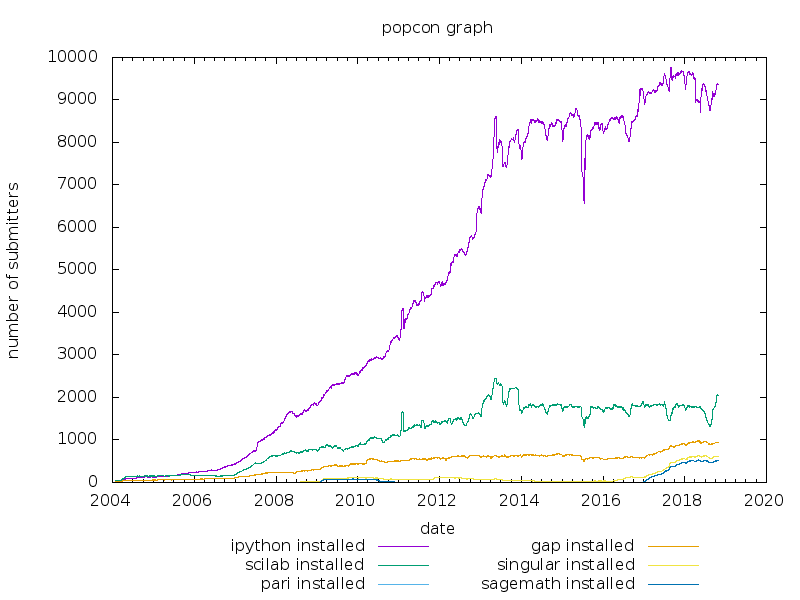

In [147]:
Image.open(io.BytesIO(a.content))

**Ubuntu**, based on ~2.8M voluntary submissions

<BarContainer object of 6 artists>

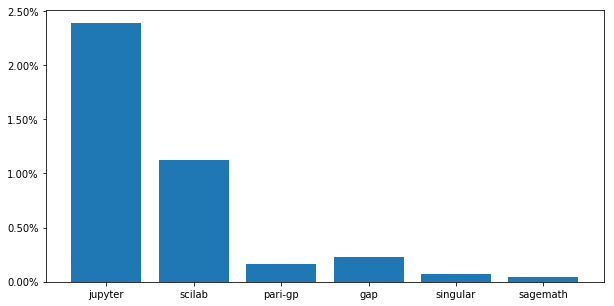

In [12]:
ubuntu = { 'jupyter': 66917, 'scilab': 31386, 'pari-gp': 4568, 'gap': 6532, 'singular': 1960, 'sagemath': 1126 }
fig = plt.figure(1, (10,5)); ax = fig.add_subplot(1,1,1); ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.bar(ubuntu.keys(), [v / 28000 for v in ubuntu.values()])

### Docker hub

<https://hub.docker.com/r/sagemath/> and <https://hub.docker.com/u/gapsystem/>

- 10k pulls for `sagemath-jupyter`
- 5.7k pulls for `sagemath`
- 3.8K pulls for `gap-docker`

Compare with <https://hub.docker.com/r/jupyter/>, which states 1M+ pulls for `scipy-notebook`.


## The future

### Packaging (D3.10)

- Consolidate available packages, work on inter-compatibility.
- Make packages for Conda.
- Move SageMath to Python 3.
- Improve workflows for user code sharing.

### Conda packages

From Conda Forge:

- Jupyter 380K downloads: <https://anaconda.org/conda-forge/jupyter>
- Sage 6K downloads: <https://anaconda.org/conda-forge/sage>

### Sage on PyPI

- 80 packages in PyPI, not all Sage-related.
- Make them easily discoverable, document workflows.

## Aims

> **Aim 1:** Improve the productivity of researchers ...

> **Aim 2:** Make it easy for teams of researchers of any size to set up custom, collaborative Virtual
Research Environments ...

> **Aim 3:** Identify and promote best practices ...

> **Aim 4:** Maximise sustainability and impact ...

## KPIs

- GAP packages **code coverage**: 69% (4.9) → 75% (4.10).
- **Freshness** of GAP packages: 50% released in the last year.
- SageMath on **Windows**: 44% (happy) Windows users.
- Packaging (not counting alt. methods, such as Conda):
  - **Arch:** 50% of Jupyter users are also ODK users;
  - **Debian:** 10% of Jupyter users are also ODK users.
- Medium sized VRE **deployments**: 20h of work, 244 LOCs.
- Docker Hub: 4K-10K pulls of ODK images.

## Lessons learned

- Well defined **components** allows us to better **work together**.
- When you extract a component from a pre-existing project, and make it available separately, **new usage patterns appear** (see CyPari, libGAP, Docker images, ...)
- Technologies change fast (see Docker, Conda, Binder), new possibilities appear. We need to constantly **keep updating** our components **to not fall behind**.